<a href="https://colab.research.google.com/github/JibKh/NVIDIA-FlowNet2-Google-Colab/blob/master/FlowNet2_Colab_Incomp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup and Install FlowNet2

In [1]:
!nvcc --version
!nvidia-smi

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243
Tue Oct 13 05:49:02 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+

In [36]:
!pip install torch==1.0.0 torchvision==0.2.2 -f https://download.pytorch.org/whl/cu100/torch_stable.html
!pip install pypng
!pip install tensorboardx
!pip install setproctitle colorama scipy==1.1.0

  Using cached https://files.pythonhosted.org/packages/a8/0b/f163da98d3a01b3e0ef1cab8dd2123c34aee2bafbb1c5bffa354cc8a1730/scipy-1.1.0-cp36-cp36m-manylinux1_x86_64.whl
ERROR: umap-learn 0.4.6 has requirement scipy>=1.3.1, but you'll have scipy 1.1.0 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement scipy==1.4.1, but you'll have scipy 1.1.0 which is incompatible.
ERROR: plotnine 0.6.0 has requirement scipy>=1.2.0, but you'll have scipy 1.1.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


In [3]:
import os
# get flownet2-pytorch source
!git clone https://github.com/NVIDIA/flownet2-pytorch.git
!mv /content/flownet2-pytorch /content/flownet2pytorch
os.chdir('./flownet2pytorch')
# install custom layers
!bash install.sh

Cloning into 'flownet2-pytorch'...
remote: Enumerating objects: 557, done.
remote: Total 557 (delta 0), reused 0 (delta 0), pack-reused 557
Receiving objects: 100% (557/557), 6.28 MiB | 31.68 MiB/s, done.
Resolving deltas: 100% (312/312), done.
running install
running bdist_egg
running egg_info
creating correlation_cuda.egg-info
writing correlation_cuda.egg-info/PKG-INFO
writing dependency_links to correlation_cuda.egg-info/dependency_links.txt
writing top-level names to correlation_cuda.egg-info/top_level.txt
writing manifest file 'correlation_cuda.egg-info/SOURCES.txt'
writing manifest file 'correlation_cuda.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_ext
building 'correlation_cuda' extension
creating build
creating build/temp.linux-x86_64-3.6
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/

In [4]:
import os
os.sys.path.append('/root/.local/lib/python3.6/site-packages/resample2d_cuda-0.0.0-py3.6-linux-x86_64.egg')
os.sys.path.append('/root/.local/lib/python3.6/site-packages/correlation_cuda-0.0.0-py3.6-linux-x86_64.egg')
os.sys.path.append( '/root/.local/lib/python3.6/site-packages/channelnorm_cuda-0.0.0-py3.6-linux-x86_64.egg')

In [5]:
!python main.py --help

usage: main.py [-h] [--start_epoch START_EPOCH] [--total_epochs TOTAL_EPOCHS]
               [--batch_size BATCH_SIZE] [--train_n_batches TRAIN_N_BATCHES]
               [--crop_size CROP_SIZE [CROP_SIZE ...]]
               [--gradient_clip GRADIENT_CLIP]
               [--schedule_lr_frequency SCHEDULE_LR_FREQUENCY]
               [--schedule_lr_fraction SCHEDULE_LR_FRACTION]
               [--rgb_max RGB_MAX] [--number_workers NUMBER_WORKERS]
               [--number_gpus NUMBER_GPUS] [--no_cuda] [--seed SEED]
               [--name NAME] [--save SAVE]
               [--validation_frequency VALIDATION_FREQUENCY]
               [--validation_n_batches VALIDATION_N_BATCHES]
               [--render_validation] [--inference] [--inference_visualize]
               [--inference_size INFERENCE_SIZE [INFERENCE_SIZE ...]]
               [--inference_batch_size INFERENCE_BATCH_SIZE]
               [--inference_n_batches INFERENCE_N_BATCHES] [--save_flow]
               [--resume PATH] [--log

# Training and Validation

If you do not want to train your model, you can skip this and move on to inference.

The dataset my team used is quite large and we have unlimited storage on OneDrive. So we have mounted OneDrive to read and write data to. <br>
To understand how to use it: https://www.youtube.com/watch?v=U6YPgARhRzA&t=255s&ab_channel=BoostUpStation

## OneDrive

In [ ]:
!wget https://downloads.rclone.org/v1.50.1/rclone-v1.50.1-linux-amd64.deb
!apt install ./rclone-v1.50.1-linux-amd64.deb

In [ ]:
!rclone config

In [ ]:
!sudo mkdir /content/onedrive
!nohup rclone --vfs-cache-mode writes mount onedrive: /content/onedrive &

## Train and Validate

In [ ]:
!python main.py --batch_size 8 --model FlowNet2 --loss=L1Loss --optimizer=Adam --optimizer_lr=1e-4 \
--training_dataset MpiSintelFinal --training_dataset_root /path/to/mpi-sintel/final/dataset  \
--validation_dataset MpiSintelClean --validation_dataset_root /path/to/mpi-sintel/clean/dataset

# Run the inference

## Setup Video

### Upload Video

1) Upload your own video from Google Drive. <br>
2) Upload a video from your local machine. They will be saved in flownet2pytorch folder.

In [ ]:
# Name of your video
videoName = "./protestmarch_4k.mp4"

In [ ]:
# Download from Google drive
from google_drive_downloader import GoogleDriveDownloader as gdd
gdd.download_file_from_google_drive(file_id='18kfA8pQyXCN-Tk6HREbgZL6mKPttJ3cg',dest_path=videoName)

In [ ]:
# Or upload from local machine
from google.colab import files
uploaded = files.upload()

Saving protestmarch_4k.mp4 to protestmarch_4k.mp4


### Converting video to frames

In [ ]:
import os
def mkdir_ifnotexists(dir):
    if os.path.exists(dir):
        return
    os.mkdir(dir)

In [ ]:
vid_file=videoName
frame_pth='./frames'
mkdir_ifnotexists(frame_pth)
cmd = "ffmpeg -i %s -start_number 0 -vsync 0 %s/frame_%%06d.png" % (
            vid_file,
            frame_pth,
        )
os.system(cmd)

0

### Download Frames

In [33]:
!mkdir -p ./frames

from google.colab import drive
drive.mount('/content/gdrive')

!unzip '../gdrive/My Drive/Hajj Videos/Frames/5 - Video.zip' -d ./frames

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Archive:  ../gdrive/My Drive/Hajj Videos/Frames/5 - Video.zip
mapname:  conversion of  failed
 extracting: ./frames/20180820173913572_UTC+01.jpg  
 extracting: ./frames/20180820173913037_UTC+01.jpg  
 extracting: ./frames/20180820173913038_UTC+01.jpg  
 extracting: ./frames/20180820173913438_UTC+01.jpg  
 extracting: ./frames/20180820173913172_UTC+01.jpg  
 extracting: ./frames/20180820173913171_UTC+01.jpg  
 extracting: ./frames/20180820173913705_UTC+01.jpg  
 extracting: ./frames/20180820173912905_UTC+01.jpg  
 extracting: ./frames/20180820173913305_UTC+01.jpg  
 extracting: ./frames/20180820173913706_UTC+01.jpg  
 extracting: ./frames/20180820173912904_UTC+01.jpg  
 extracting: ./frames/20180820173913304_UTC+01.jpg  
 extracting: ./frames/20180820173913439_UTC+01.jpg  
 extracting: ./frames/20180820173913571_UTC+01.jpg  


### Backup and Rename

In [50]:
# !cp -R ./frames ./frames_backup

In [34]:
import os

file_dir = "./frames/"
for count, filename in enumerate(sorted(os.listdir(file_dir))):
  # print(filename)
  if filename[-11:] == "_UTC+01.jpg":
    src = file_dir + filename
    dst = file_dir + str(count).zfill(6) + '.png'
    os.rename(src, dst)

### Skip Frames

In [25]:
!ls ./frames | wc -l

1927


In [32]:
!rm -r ./frames
!rm -r ./FlowFrames
!rm -r ./output
!pip install setproctitle colorama scipy==1.1.0
# !rm -r ./frames_backup

In [21]:
!cp -R ./frames_backup ./frames

In [20]:
# Frames to skip
directory = './frames'
no_frames_skip = 2

for i, file in enumerate(sorted(os.listdir(directory))):
  if (file[-4:] == ".png") and (int(file[0:-4]) % no_frames_skip == 0):
    # print(file)
    os.remove(directory+'/' + file)

In [21]:
import os

file_dir = "./frames/"
for count, filename in enumerate(sorted(os.listdir(file_dir))):
  if filename[-4:] == ".png":
    src = file_dir + filename
    dst = file_dir + str(count).zfill(6) + '.png'
    os.rename(src, dst)

## Run Inference

Download the checkpoint. <br>
If you have your own checkpoint after training, skip this step.

In [23]:
from google_drive_downloader import GoogleDriveDownloader as gdd
gdd.download_file_from_google_drive(file_id='1hF8vS6YeHkx3j2pfCeQqqZGwA_PJq_Da',dest_path='./FlowNet2_checkpoint.pth.tar')

Run inference. <br>
You can learn more about each command from here: https://towardsdatascience.com/generating-optical-flow-using-nvidia-flownet2-pytorch-implementation-d7b0ae6f8320

In [37]:
!python main.py --inference --model FlowNet2 --save_flow --save ./output --inference_dataset ImagesFromFolder --inference_dataset_root ./frames/ --resume ./FlowNet2_checkpoint.pth.tar

Parsing Arguments
  [0.037s] batch_size: 8
  [0.037s] crop_size: [256, 256]
  [0.037s] fp16: False
  [0.037s] fp16_scale: 1024.0
  [0.037s] gradient_clip: None
  [0.037s] inference: True
  [0.037s] inference_batch_size: 1
  [0.037s] inference_dataset: ImagesFromFolder
  [0.037s] inference_dataset_iext: png
  [0.037s] inference_dataset_replicates: 1
  [0.037s] inference_dataset_root: ./frames/
  [0.037s] inference_n_batches: -1
  [0.037s] inference_size: [-1, -1]
  [0.037s] inference_visualize: False
  [0.037s] log_frequency: 1
  [0.037s] loss: L1Loss
  [0.037s] model: FlowNet2
  [0.037s] model_batchNorm: False
  [0.037s] model_div_flow: 20.0
  [0.037s] name: run
  [0.037s] no_cuda: False
  [0.038s] number_gpus: 1
  [0.038s] number_workers: 8
  [0.038s] optimizer: Adam
  [0.038s] optimizer_amsgrad: False
  [0.038s] optimizer_betas: (0.9, 0.999)
  [0.038s] optimizer_eps: 1e-08
  [0.038s] optimizer_lr: 0.001
  [0.038s] optimizer_weight_decay: 0
  [0.038s] render_validation: False
  [0.038

# Visualizing flo files

### Install scipy as some tensorflow functionality requires updated scipy

In [38]:
!pip install scipy==1.4.1

  Using cached https://files.pythonhosted.org/packages/dc/29/162476fd44203116e7980cfbd9352eef9db37c49445d1fec35509022f6aa/scipy-1.4.1-cp36-cp36m-manylinux1_x86_64.whl
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.1.0
    Uninstalling scipy-1.1.0:
      Successfully uninstalled scipy-1.1.0


### Define show_flow() for visualization.
 Original Source https://github.com/sampepose/flownet2-tf/blob/master/src/flowlib.py

In [39]:
# Source:https://github.com/sampepose/flownet2-tf/blob/master/src/flowlib.py
import matplotlib.pyplot as plt
import numpy as np

UNKNOWN_FLOW_THRESH = 1e7
def show_flow(filename):
    """
    visualize optical flow map using matplotlib
    :param filename: optical flow file
    :return: None
    """
    flow = read_flow(filename)
    img = flow_to_image(flow)
    plt.imshow(img)
    plt.show()

def read_flow(filename):
    """
    read optical flow from Middlebury .flo file
    :param filename: name of the flow file
    :return: optical flow data in matrix
    """
    f = open(filename, 'rb')
    magic = np.fromfile(f, np.float32, count=1)
    data2d = None

    if 202021.25 != magic:
        print ('Magic number incorrect. Invalid .flo file')
    else:
        w = int(np.fromfile(f, np.int32, count=1)[0])
        h = int(np.fromfile(f, np.int32, count=1)[0])
        #print("Reading %d x %d flo file" % (h, w))
        data2d = np.fromfile(f, np.float32, count=2 * w * h)
        # reshape data into 3D array (columns, rows, channels)
        data2d = np.resize(data2d, (h, w, 2))
    f.close()
    return data2d

def flow_to_image(flow):
    """
    Convert flow into middlebury color code image
    :param flow: optical flow map
    :return: optical flow image in middlebury color
    """
    u = flow[:, :, 0]
    v = flow[:, :, 1]

    maxu = -999.
    maxv = -999.
    minu = 999.
    minv = 999.

    idxUnknow = (abs(u) > UNKNOWN_FLOW_THRESH) | (abs(v) > UNKNOWN_FLOW_THRESH)
    u[idxUnknow] = 0
    v[idxUnknow] = 0

    maxu = max(maxu, np.max(u))
    minu = min(minu, np.min(u))

    maxv = max(maxv, np.max(v))
    minv = min(minv, np.min(v))

    rad = np.sqrt(u ** 2 + v ** 2)
    maxrad = max(-1, np.max(rad))

    #print( "max flow: %.4f\nflow range:\nu = %.3f .. %.3f\nv = %.3f .. %.3f" % (maxrad, minu,maxu, minv, maxv))

    u = u/(maxrad + np.finfo(float).eps)
    v = v/(maxrad + np.finfo(float).eps)

    img = compute_color(u, v)

    idx = np.repeat(idxUnknow[:, :, np.newaxis], 3, axis=2)
    img[idx] = 0

    return np.uint8(img)


def compute_color(u, v):
    """
    compute optical flow color map
    :param u: optical flow horizontal map
    :param v: optical flow vertical map
    :return: optical flow in color code
    """
    [h, w] = u.shape
    img = np.zeros([h, w, 3])
    nanIdx = np.isnan(u) | np.isnan(v)
    u[nanIdx] = 0
    v[nanIdx] = 0

    colorwheel = make_color_wheel()
    ncols = np.size(colorwheel, 0)

    rad = np.sqrt(u**2+v**2)

    a = np.arctan2(-v, -u) / np.pi

    fk = (a+1) / 2 * (ncols - 1) + 1

    k0 = np.floor(fk).astype(int)

    k1 = k0 + 1
    k1[k1 == ncols+1] = 1
    f = fk - k0

    for i in range(0, np.size(colorwheel,1)):
        tmp = colorwheel[:, i]
        col0 = tmp[k0-1] / 255
        col1 = tmp[k1-1] / 255
        col = (1-f) * col0 + f * col1

        idx = rad <= 1
        col[idx] = 1-rad[idx]*(1-col[idx])
        notidx = np.logical_not(idx)

        col[notidx] *= 0.75
        img[:, :, i] = np.uint8(np.floor(255 * col*(1-nanIdx)))

    return img


def make_color_wheel():
    """
    Generate color wheel according Middlebury color code
    :return: Color wheel
    """
    RY = 15
    YG = 6
    GC = 4
    CB = 11
    BM = 13
    MR = 6

    ncols = RY + YG + GC + CB + BM + MR

    colorwheel = np.zeros([ncols, 3])

    col = 0

    # RY
    colorwheel[0:RY, 0] = 255
    colorwheel[0:RY, 1] = np.transpose(np.floor(255*np.arange(0, RY) / RY))
    col += RY

    # YG
    colorwheel[col:col+YG, 0] = 255 - np.transpose(np.floor(255*np.arange(0, YG) / YG))
    colorwheel[col:col+YG, 1] = 255
    col += YG

    # GC
    colorwheel[col:col+GC, 1] = 255
    colorwheel[col:col+GC, 2] = np.transpose(np.floor(255*np.arange(0, GC) / GC))
    col += GC

    # CB
    colorwheel[col:col+CB, 1] = 255 - np.transpose(np.floor(255*np.arange(0, CB) / CB))
    colorwheel[col:col+CB, 2] = 255
    col += CB

    # BM
    colorwheel[col:col+BM, 2] = 255
    colorwheel[col:col+BM, 0] = np.transpose(np.floor(255*np.arange(0, BM) / BM))
    col += + BM

    # MR
    colorwheel[col:col+MR, 2] = 255 - np.transpose(np.floor(255 * np.arange(0, MR) / MR))
    colorwheel[col:col+MR, 0] = 255

    return colorwheel

### Visualize

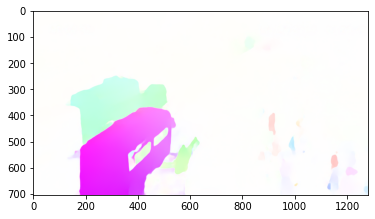

In [40]:
show_flow('/content/flownet2pytorch/output/inference/run.epoch-0-flow-field/000001.flo')

### Save Flo files as images

In [41]:
import os
import PIL.Image
def mkdir_ifnotexists(dir):
    if os.path.exists(dir):
        return
    os.mkdir(dir)


flo_pth='/content/flownet2pytorch/output/inference/run.epoch-0-flow-field/'
flos=[flo_pth + f for f in os.listdir(flo_pth)]
mkdir_ifnotexists('./FlowFrames')
for i in range(len(flos)):
  PIL.Image.fromarray(flow_to_image(read_flow(flos[i]))).save('./FlowFrames/'+os.path.basename(flos[i])+'.png')
  os.remove(flos[i])

### Generate video from Flo

In [42]:
os.system('ffmpeg -r 15 -i FlowFrames/%6d.flo.png -vcodec libx264 -b 10M -y 5_No_Skip.mp4')

0

In [43]:
from google.colab import files
files.download('5_No_Skip.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [44]:
# from IPython.display import HTML
# from base64 import b64encode
# mp4 = open('FlowVideo.mp4','rb').read()
# data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
# HTML("""
# <video width=400 controls>
#       <source src="%s" type="video/mp4">
# </video>
# """ % data_url)